# Objective: Analysing historical climate data to understand trends and predict future climate patterns in Tanzania.

# Data Preprocessing

In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data.csv')

print(df.head())

   Year  Month  Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
0  2000      1                   26.1               19.8               32.0   
1  2000      2                   25.8               87.3               29.5   
2  2000      3                   26.8              266.5               29.9   
3  2000      4                   26.3              136.7               30.1   
4  2000      5                   26.0               63.1               30.7   

   Min_Temperature_C  
0               21.9  
1               22.7  
2               21.8  
3               22.9  
4               22.4  


In [ ]:
# View information column names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    int64  
 2   Average_Temperature_C  252 non-null    float64
 3   Total_Rainfall_mm      252 non-null    float64
 4   Max_Temperature_C      252 non-null    float64
 5   Min_Temperature_C      252 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.9 KB
None


In [ ]:
# Handle Missing Values
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Fill missing values for numerical columns with the mean
numerical_columns = ['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Convert Data Types
# Combine "Year" and "Month" into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df.drop(['Year', 'Month'], axis=1, inplace=True)

Missing values in each column:
 Year                     0
Month                    0
Average_Temperature_C    0
Total_Rainfall_mm        0
Max_Temperature_C        0
Min_Temperature_C        0
dtype: int64


In [ ]:
# Feature Engineering
# Add a seasonal column based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date'].dt.month.apply(get_season)

# Add a temperature range column
df['Temp_Range_C'] = df['Max_Temperature_C'] - df['Min_Temperature_C']

# Add rolling averages (3-month moving average for temperature and rainfall)
df['Avg_Temp_3M'] = df['Average_Temperature_C'].rolling(window=3).mean()
df['Rainfall_3M'] = df['Total_Rainfall_mm'].rolling(window=3).mean()

# Encode Categorical Variables
# Use one-hot encoding for "Season"
df = pd.get_dummies(df, columns=['Season'], drop_first=True)


In [ ]:
# Output Cleaned Dataset
# Save the cleaned dataset to a CSV file
df.to_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_cleaned', index=False)

# Display final dataset info
print("Cleaned Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Average_Temperature_C  252 non-null    float64       
 1   Total_Rainfall_mm      252 non-null    float64       
 2   Max_Temperature_C      252 non-null    float64       
 3   Min_Temperature_C      252 non-null    float64       
 4   Date                   252 non-null    datetime64[ns]
 5   Temp_Range_C           252 non-null    float64       
 6   Avg_Temp_3M            250 non-null    float64       
 7   Rainfall_3M            250 non-null    float64       
 8   Season_Spring          252 non-null    bool          
 9   Season_Summer          252 non-null    bool          
 10  Season_Winter          252 non-null    bool          
dtypes: bool(3), datetime64[ns](1), float64(7)
memory usage: 16.6 KB
Cleaned Dataset Info:
 None


In [ ]:
# Load the save dataset
df = pd.read_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_cleaned')

In [ ]:
# View first 5 columns
print(df.head())

   Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
0                   26.1               19.8               32.0   
1                   25.8               87.3               29.5   
2                   26.8              266.5               29.9   
3                   26.3              136.7               30.1   
4                   26.0               63.1               30.7   

   Min_Temperature_C        Date  Temp_Range_C  Avg_Temp_3M  Rainfall_3M  \
0               21.9  2000-01-01          10.1          NaN          NaN   
1               22.7  2000-02-01           6.8          NaN          NaN   
2               21.8  2000-03-01           8.1    26.233333   124.533333   
3               22.9  2000-04-01           7.2    26.300000   163.500000   
4               22.4  2000-05-01           8.3    26.366667   155.433333   

   Season_Spring  Season_Summer  Season_Winter  
0          False          False           True  
1          False          False           True  

In [ ]:
# Impute missing values in Avg_Temp_3M and Rainfall_3M with forward-fill, backward-fill, or overall mean
df['Avg_Temp_3M'] = df['Avg_Temp_3M'].ffill().bfill().fillna(df['Avg_Temp_3M'].mean())
df['Rainfall_3M'] = df['Rainfall_3M'].ffill().bfill().fillna(df['Rainfall_3M'].mean())

# Verify that there are no missing values left
print("Missing values after imputation:\n", df[['Avg_Temp_3M', 'Rainfall_3M']].isnull().sum())

Missing values after imputation:
 Avg_Temp_3M    0
Rainfall_3M    0
dtype: int64


In [ ]:
# Save the cleaned dataset to the specified path
df.to_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_processed.csv', index=False)

print("Dataset successfully saved!")

Dataset successfully saved!


In [ ]:
# Load the processed dataset now
df = pd.read_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_processed.csv')

In [ ]:
# # View first five columns
# print(df.head())

In [ ]:
# df.info()

# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the processed dataset
df = pd.read_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_processed.csv')

# Set the Date column as the index for time-series analysis
df.set_index('Date', inplace=True)

# 1. Statistical Summaries
print("Statistical Summaries:\n")
print(df.describe())

Statistical Summaries:

       Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
count             252.000000         252.000000         252.000000   
mean               25.707540         100.363889          30.576587   
std                 0.541047          80.485087           1.292534   
min                24.200000           6.000000          28.300000   
25%                25.300000          39.325000          29.600000   
50%                25.700000          72.200000          30.500000   
75%                26.000000         147.700000          31.600000   
max                27.500000         297.400000          33.700000   

       Min_Temperature_C  Temp_Range_C  Avg_Temp_3M  Rainfall_3M  
count         252.000000    252.000000   252.000000   252.000000  
mean           21.698016      8.878571    25.712963   100.699603  
std             0.793070      1.397984     0.338407    46.812414  
min            19.700000      6.200000    24.966667    23.033333  
25%       

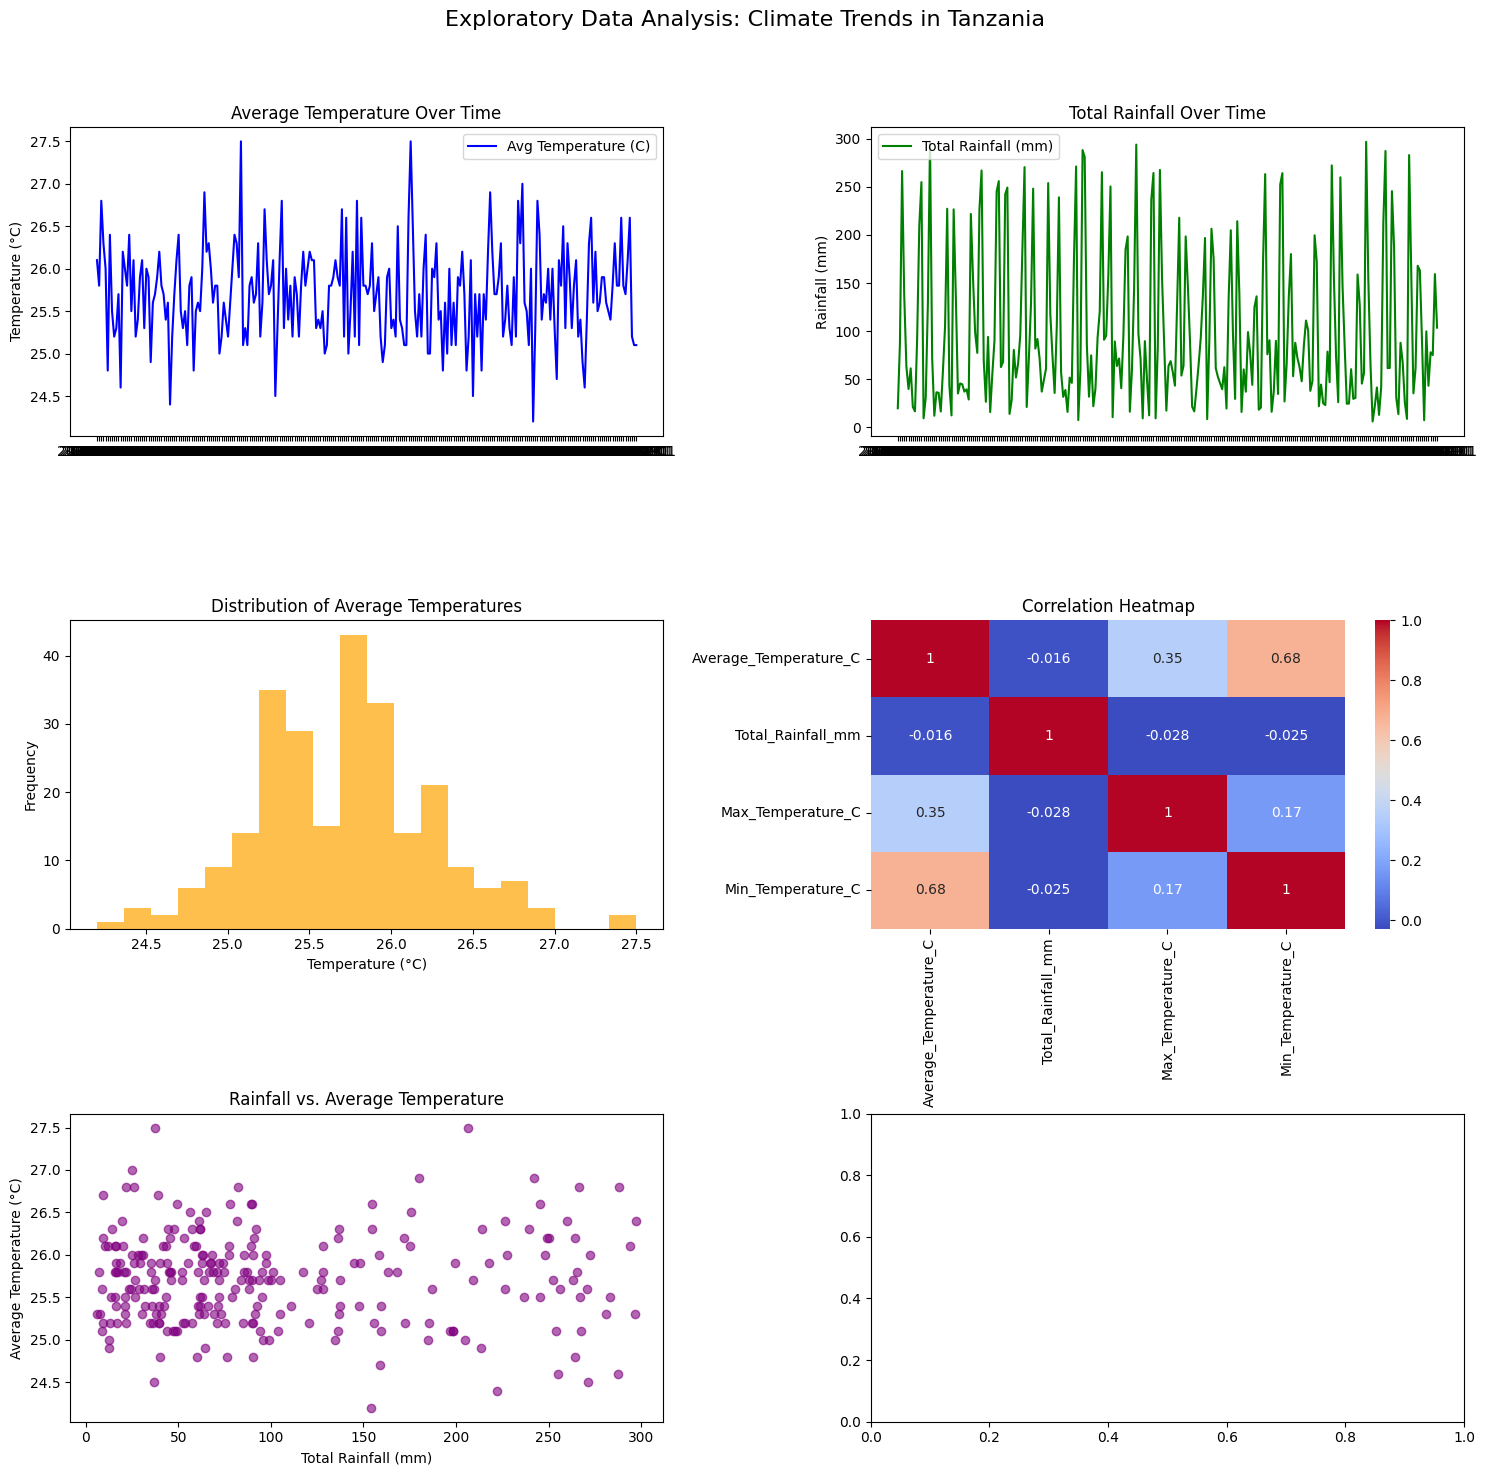

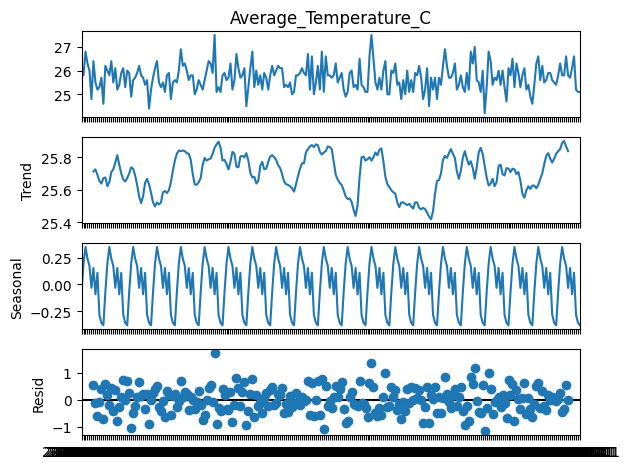

In [ ]:
# 2. Data Visualization
# Set up a subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Exploratory Data Analysis: Climate Trends in Tanzania", fontsize=16)

# (a) Time Series: Average Temperature Trends
axes[0, 0].plot(df.index, df['Average_Temperature_C'], label='Avg Temperature (C)', color='blue')
axes[0, 0].set_title("Average Temperature Over Time")
axes[0, 0].set_ylabel("Temperature (°C)")
axes[0, 0].legend()

# (b) Time Series: Total Rainfall Trends
axes[0, 1].plot(df.index, df['Total_Rainfall_mm'], label='Total Rainfall (mm)', color='green')
axes[0, 1].set_title("Total Rainfall Over Time")
axes[0, 1].set_ylabel("Rainfall (mm)")
axes[0, 1].legend()

# (c) Histogram: Temperature Distribution
df['Average_Temperature_C'].plot(kind='hist', bins=20, ax=axes[1, 0], color='orange', alpha=0.7)
axes[1, 0].set_title("Distribution of Average Temperatures")
axes[1, 0].set_xlabel("Temperature (°C)")

# (d) Heatmap: Correlation Matrix
correlation_matrix = df[['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

# (e) Scatter Plot: Rainfall vs. Temperature
axes[2, 0].scatter(df['Total_Rainfall_mm'], df['Average_Temperature_C'], alpha=0.6, color='purple')
axes[2, 0].set_title("Rainfall vs. Average Temperature")
axes[2, 0].set_xlabel("Total Rainfall (mm)")
axes[2, 0].set_ylabel("Average Temperature (°C)")

# Adjust the layout to prevent label overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ensures overall layout fits well
fig.subplots_adjust(hspace=0.6, wspace=0.35)  # Adds spacing between subplots

# 3. Seasonal Decomposition
# Perform seasonal decomposition on Average Temperature
decomposed = seasonal_decompose(df['Average_Temperature_C'], model='additive', period=12)
decomposed.plot()
plt.show()

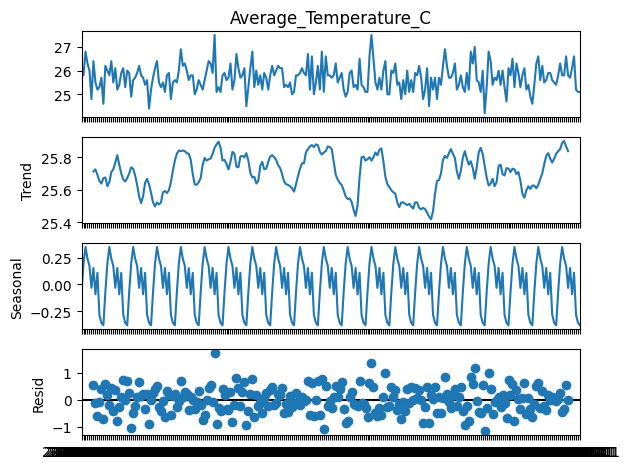

In [ ]:
# Save seasonal decomposition plot separately
decomposed.plot()
plt.savefig('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/seasonal_decomposition.png')

# Output: Save all visualisations
fig.savefig('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/eda_visualisations.png')

# Machine Learning Model Development

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Load the cleaned dataset
df = pd.read_csv('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/tanzania_climate_data_processed.csv', parse_dates=['Date'])

# Set "Average_Temperature_C" as the target variable
target = 'Average_Temperature_C'

# Features to include in the model
features = [
    'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C',
    'Temp_Range_C', 'Rainfall_3M', 'Season_Spring', 'Season_Summer', 'Season_Winter'
]

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select Machine Learning Models
# Option 1: Linear Regression
linear_model = LinearRegression()

# Option 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Models
# Train Linear Regression Model
linear_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model.fit(X_train, y_train)

# Evaluate Model Performance
# Predictions for Linear Regression
linear_preds = linear_model.predict(X_test)

# Predictions for Random Forest
rf_preds = rf_model.predict(X_test)

# Performance Metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Evaluate Linear Regression
evaluate_model(y_test, linear_preds, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, rf_preds, "Random Forest")

# Save the best-performing model (Random Forest in this case) to a file
joblib.dump(rf_model, 'drive/MyDrive/Climate Change Analysis in Tanzania Dataset/climate_rf_model.pkl')

print("Model training and evaluation completed. Best model saved as 'climate_tz_model.pkl'.")

Linear Regression - MAE: 0.33, RMSE: 0.41
Random Forest - MAE: 0.36, RMSE: 0.46
Model training and evaluation completed. Best model saved as 'climate_tz_model.pkl'.


**Output Summary**

Linear Regression demonstrated slightly superior performance compared to Random Forest, as indicated by lower MAE and RMSE values. This suggests a predominantly linear relationship between the target variable (*Average\_Temperature\_C*) and the input features, making Linear Regression a suitable choice for this dataset.

Although the performance gap between the two models is minimal, it indicates that both are reasonably effective. However, given its simplicity, interpretability, and marginally better accuracy, Linear Regression is the preferred model. The added complexity of Random Forest is not warranted for this task, considering the linear nature of the data relationships.


# Hyperparameter Tuning and Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grid (smaller for faster tuning)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Set up model
rf = RandomForestRegressor(random_state=42)

# GridSearch with parallel processing and fewer folds
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,  # Use all cores
    scoring='neg_mean_squared_error',
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Predict
rf_preds_tuned = best_rf_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, rf_preds_tuned)
rmse = np.sqrt(mean_squared_error(y_test, rf_preds_tuned))

print(f"Tuned Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuned Random Forest - MAE: 0.36, RMSE: 0.46


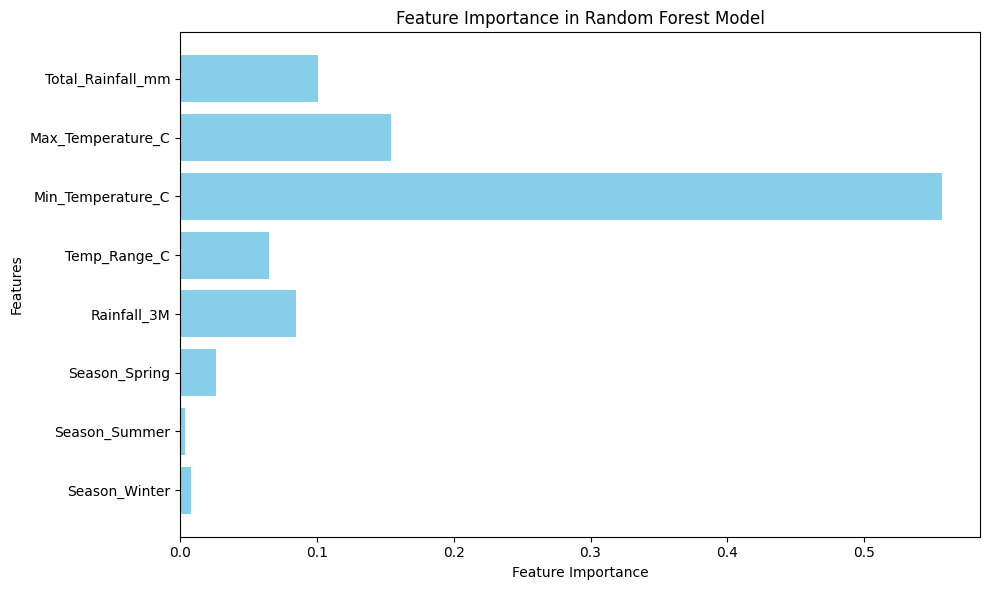

In [ ]:
# Feature Importance Analysis
# Extract feature importance from the best model
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()

# Save the feature importance plot
plt.savefig('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/feature_importance_rf.png')
plt.show()

In [ ]:
import joblib

# Save the trained Linear Regression model
joblib.dump(linear_model, 'drive/MyDrive/Climate Change Analysis in Tanzania Dataset/linear_regression_model.pkl')

print("Linear Regression model saved successfully as 'linear_regression_model.pkl'!")

Linear Regression model saved successfully as 'linear_regression_model.pkl'!


# Generate Predictions for Future Data

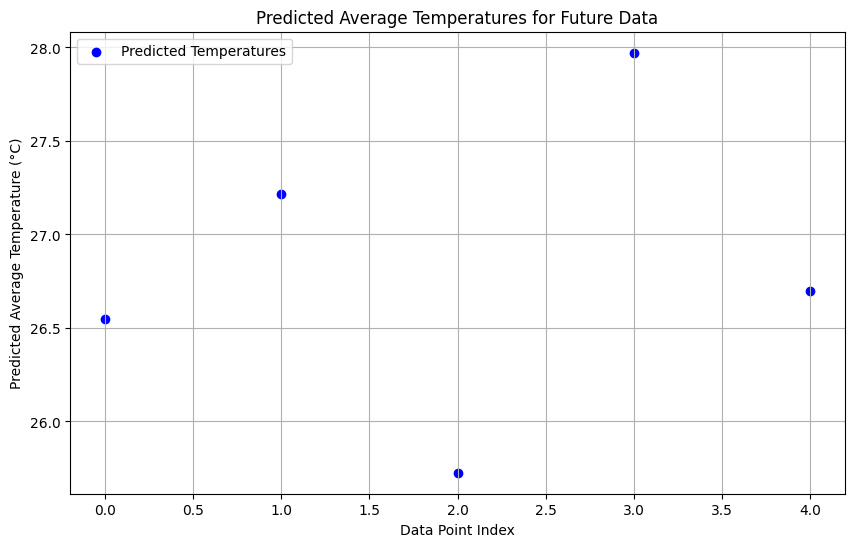

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Load the saved Linear Regression model
model_path = 'drive/MyDrive/Climate Change Analysis in Tanzania Dataset/linear_regression_model.pkl'
linear_model = joblib.load(model_path)

# Example of unseen or future data
future_data = pd.DataFrame({
    'Total_Rainfall_mm': [120, 150, 90, 200, 180],
    'Max_Temperature_C': [36, 38, 34, 39, 37],
    'Min_Temperature_C': [22, 24, 21, 25, 23],
    'Temp_Range_C': [14, 14, 13, 14, 14],
    'Rainfall_3M': [350, 400, 320, 450, 410],
    'Season_Spring': [1, 0, 0, 1, 0],
    'Season_Summer': [0, 1, 0, 0, 1],
    'Season_Winter': [0, 0, 1, 0, 0]
})

# Make predictions
predictions = linear_model.predict(future_data)

# Add predictions to the DataFrame
future_data['Predicted_Avg_Temperature_C'] = predictions

# Visualize the predictions
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted
plt.scatter(range(len(future_data)), future_data['Predicted_Avg_Temperature_C'], color='blue', label='Predicted Temperatures')

# Add labels and legend
plt.title('Predicted Average Temperatures for Future Data')
plt.xlabel('Data Point Index')
plt.ylabel('Predicted Average Temperature (°C)')
plt.legend()
plt.grid()

# Save and show the plot
plt.savefig('drive/MyDrive/Climate Change Analysis in Tanzania Dataset/predicted_temperatures_plot.png')
plt.show()

# Streamlit Deployment

In [ ]:
# !pip install streamlit
# !pip install pyngrok

In [ ]:
# import streamlit as st
# import pandas as pd
# import joblib
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor

# # Load the saved Linear Regression model
# model_path = 'drive/MyDrive/Climate Change Analysis in Tanzania Dataset/linear_regression_model.pkl'
# linear_model = joblib.load(model_path)

# # Set Streamlit page configuration
# st.set_page_config(page_title="Climate Predictions in Tanzania", layout="wide")

# # Sidebar for navigation
# st.sidebar.title("Climate Prediction App")
# app_mode = st.sidebar.radio("Navigate", ["Home", "EDA", "Predict"])

# # Home Section
# if app_mode == "Home":
#     st.title("Climate Prediction in Tanzania")
#     st.write("""
#     This app uses historical climate data to predict future climate conditions in Tanzania.
#     Explore the interactive visualizations and make real-time predictions using the machine learning model.
#     """)

#     # Add an image or banner
#     st.image("https://images.unsplash.com/photo-1571558826400-ecfcb51a3b94", caption="Climate and Weather Trends", use_column_width=True)

# # EDA Section
# elif app_mode == "EDA":
#     st.title("Exploratory Data Analysis (EDA)")
#     st.write("Visualizations of historical climate trends in Tanzania.")

#     # Load example plots (replace with actual plots)
#     st.image("drive/MyDrive/Climate Change Analysis in Tanzania Dataset/predicted_temperatures_plot.png", caption="Predicted Temperatures")
#     st.image("drive/MyDrive/Climate Change Analysis in Tanzania Dataset/feature_importance_rf.png", caption="Feature Importance")

# # Predict Section
# elif app_mode == "Predict":
#     st.title("Predict Future Climate Conditions")
#     st.write("Enter the climate parameters to predict the average temperature.")

#     # Input sliders for user parameters
#     Total_Rainfall_mm = st.slider("Total Rainfall (mm)", 0, 500, 100)
#     Max_Temperature_C = st.slider("Max Temperature (°C)", 20, 50, 30)
#     Min_Temperature_C = st.slider("Min Temperature (°C)", 10, 30, 20)
#     Temp_Range_C = Max_Temperature_C - Min_Temperature_C
#     Rainfall_3M = st.slider("Rainfall (3-Month Rolling Average, mm)", 0, 1000, 300)

#     # Seasonal dropdowns
#     season = st.selectbox("Season", ["Spring", "Summer", "Winter"])
#     Season_Spring = 1 if season == "Spring" else 0
#     Season_Summer = 1 if season == "Summer" else 0
#     Season_Winter = 1 if season == "Winter" else 0

#     # Create a DataFrame for prediction
#     input_data = pd.DataFrame({
#         'Total_Rainfall_mm': [Total_Rainfall_mm],
#         'Max_Temperature_C': [Max_Temperature_C],
#         'Min_Temperature_C': [Min_Temperature_C],
#         'Temp_Range_C': [Temp_Range_C],
#         'Rainfall_3M': [Rainfall_3M],
#         'Season_Spring': [Season_Spring],
#         'Season_Summer': [Season_Summer],
#         'Season_Winter': [Season_Winter]
#     })

#     # Predict button
#     if st.button("Predict"):
#         prediction = linear_model.predict(input_data)[0]
#         st.success(f"Predicted Average Temperature: {prediction:.2f}°C")